# Import

In [18]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [38]:
train = pd.read_csv('../Input Files/Digit Recognizer/train.csv')
test = pd.read_csv('../Input Files/Digit Recognizer/test.csv')
train = train.sample(10000, random_state = 8)
test = test.sample(10000, random_state = 8)
y = train['label'].values

In [29]:
train = train[test.columns].values
test = test[test.columns].values

# Train - Data

## Training 10K MNIST

In [39]:
tsne = TSNE(n_components=2)
train_2D = tsne.fit_transform(train)

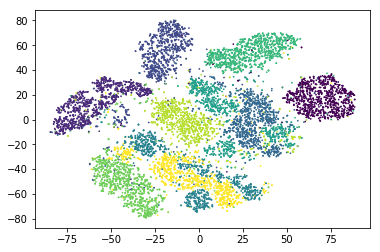

In [40]:
plt.scatter(train_2D[:,0], train_2D[:,1], c = y, s = 0.5)

## Train Kannada MNIST

In [ ]:
from time import time

import numpy as np
import pandas as pd


# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
# import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
train = pd.read_csv('../Input Files/Kannada-MNIST/train.csv')
test = pd.read_csv('../Input Files/Kannada-MNIST/test.csv')

### First Approach

Vanilla Approach - PCA - t-SNE

In [3]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(60000, 784)
[0 1 2 ... 7 8 9]


In [4]:
# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [5]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

Wall time: 0 ns


In [7]:
# Using the output of PCA as input for t-SNE
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

Wall time: 0 ns


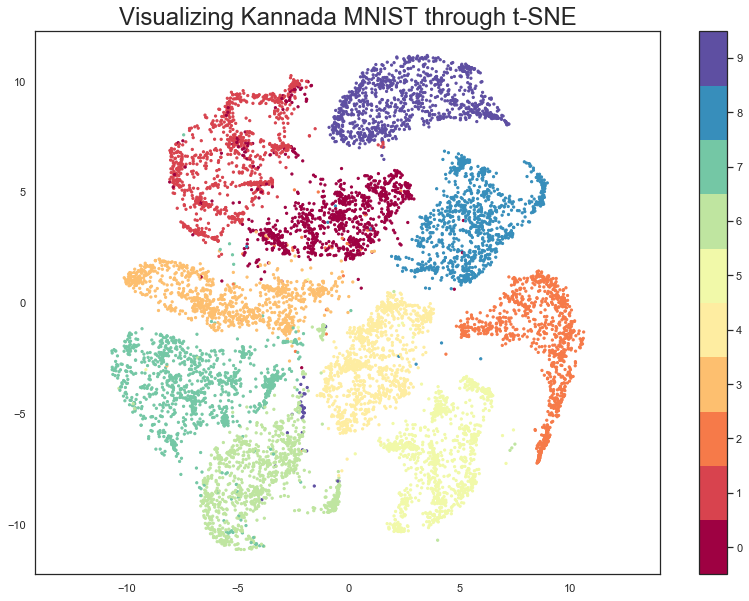

In [11]:
#visualising t-SNE again 

plt.figure(figsize=(14,10))
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

### Second Approach

Standardize - PCA - t-SNE

In [39]:
cnt=0
for x in yi:
    cnt+=1
    if x > 0.9:
        print(cnt)
        break

161


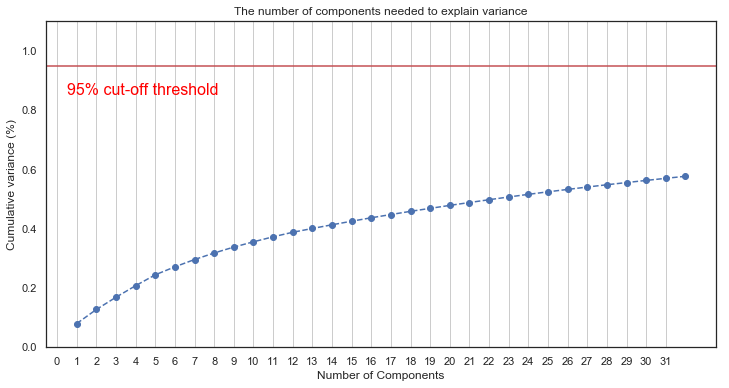

In [56]:
pca = PCA().fit(data_rescaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

ln=33
step=1

fig, ax = plt.subplots()
xi = np.arange(1, ln, step=step)
yi = np.cumsum(pca.explained_variance_ratio_)
yi = yi.tolist()[:ln-1]

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, ln-1, step=step)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

---

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_subset = scaler.fit_transform(x_subset)

In [60]:
from sklearn.decomposition import PCA
pca_161 = PCA(n_components=161)
pca_result_161 = pca_161.fit_transform(x_subset)

In [61]:
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_161)

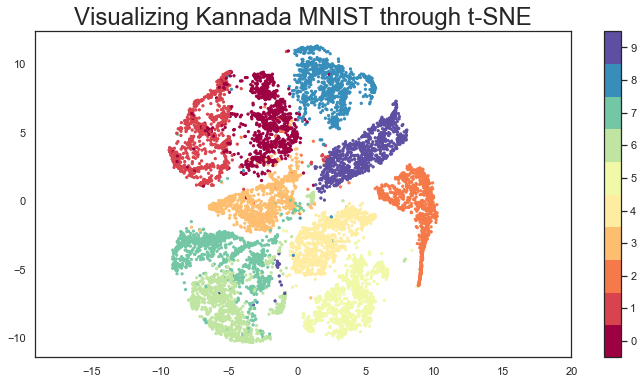

In [62]:
#visualising t-SNE again 
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);